<a href="https://colab.research.google.com/github/Kandeo/Core-Week-9/blob/main/Naive_Bayes_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spam Classification Predictive Model**

**Overview** 

This project involves implementing a Naive Bayes classifier to classify emails as spam and non-spam. Once the experiment is conducted, the resulting metrics are to be calculated.

Experimental Procedure:

1. Downloading the dataset.
2. Randomly partitioning the dataset into two parts; 80-20 sets.
5. Computing the accuracy (percentage of correct classification).
6. Reporting the confusion matrix of the classifier.
7. Repeating step 2 to step 4 twice, each time splitting the dataset differently i.e. 70-30, 60-40, then noting the outcomes of the modeling.
8. Suggesting and applying at least one of the optimization techniques learned.
9. Providing further recommendations to improve the classifier.

The dataset has been taken from the UCI ML repository and contains about 4,600 emails labelled as spam or non-spam.

Dataset: https://archive.ics.uci.edu/ml/datasets/Spambase 

# **Defining the Question**

**Specific Data Analytics Question**

Building a Naive bayes model that determines whether a given email is spam or non-spam

**Metrics for success**

The model should have a true positive rate of 90% and above

**Understanding the Context**

Communication by email is one of the most important means of communication in the cooperate and private setups. An internet user is constantly confronted by mass emails containing undesired information. Spam emails are generally defined as bulk unsolicited emailing, generally commercial in nature, and predominately fraudulent.

The Spambase dataset collected at Hewlett-Packard Labs, classifies 4601 emails as spam or non-spam. In addition to this class label there are 57 variables indicating the frequency of certain words and characters in the email.

The collection of spam emails came from the collectors postmaster and individuals who had filed spam. The collection of non-spam emails came from filed work and personal emails hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.


**Experimental Design**

1. Data Preparation
 - Data Loading
 - Data Uniformity
 - Handling missing/duplicate values
3. Data Exploration
 - Univariate analysis
4. Modelling
 - Instantiating the models
 - Performance Evaluation
 - Hyperparameter Tuning
 - Prediction
5. Performance Analysis
 - Assessing Accuracy
 - Recommendations and Conclusions

**Data Relevance**

- The first 48 variables contain the frequency of the variable name in the e-mail, E.g: business, our, make, over, all...

- If the variable name starts with num, E.g: num650 it indicates the frequency of the corresponding number 650. 

- The variables 49-54 indicate the frequency of the characters. E.g ; , ( , [ , ! , $ , #. 

- The variables 55-57 contain the average, longest and total run-length of capital letters. 

- Variable 58 indicates the type of the mail either Spam - 1 or Non-Spam - 0.



# **Data Preparation**

Data Loading

In [ ]:
#Importing the respective dependencies:

#1. For Data wrangling and visualization:
import pandas as pd 
import numpy as np      
import seaborn as sns   
import matplotlib.pyplot as plt

#2. Machine Learning Models:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

#3. For Model Evaluation:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

#4. Removing Warnings:
import warnings
warnings.filterwarnings("ignore")


Loading the Dataset

In [ ]:
#Naming the respective columns:
cols = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove",
        "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", 
        "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", 
        "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", 
        "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",  "word_freq_telnet", "word_freq_857", "word_freq_data", 
        "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
        "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table",
        "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", 
        "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", "spam"]

#Loading the dataset from the UCI repository:
Spam = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', names=cols, header=None)

#Printing the first 4 rows of the data:
Spam.head(4)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1


In [ ]:
#Checking the number of rows and columns:
Spam.shape


(4601, 58)

Data Uniformity

In [ ]:
#Information about the data:
Spam.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

Missing/Duplicate Values

In [ ]:
#Checking for null entries in each column:
Spam.isnull().sum()


word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [ ]:
#Checking for duplicates:
Spam.duplicated().sum()     #391 duplicates identified

#Dropping duplicates:
Spam.drop_duplicates(inplace=True)
Spam.duplicated().sum()


0

# **Data Exploration**

1. **Univariate Analysis**

This analysis describes the data in terms of:

 - Spam/Non-Spam distribution

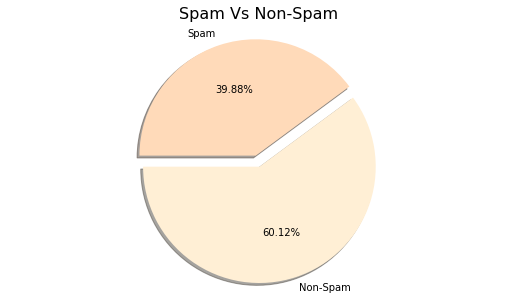

In [ ]:
#Viewing the data in terms of spams and non-spams:
spam = Spam['spam'].value_counts()
spam
# 0: 2,531(Non-spam)      1:  1,679(Spam)

#Visualising the information on a pie chart:
labels= ['Non-Spam','Spam']
colors=['papayawhip', 'peachpuff']
fontsize = 16
plt.figure(figsize= (9, 5))
plt.title("Spam Vs Non-Spam", fontsize = fontsize)
plt.pie(spam, labels=labels, colors=colors, startangle=180, shadow=True,explode=(0, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.show()


40% of the E-mails are classified as Spam

 - Descriptive Summary

In [ ]:
#To view the descriptive summary:
Spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,0.056686,0.565204,0.097656,0.061211,0.044803,0.253829,0.149154,0.188755,1.718368,0.084962,0.810040,0.131587,0.100622,0.090969,0.573995,0.279330,0.369838,0.128575,0.098382,0.103779,0.063544,0.044917,0.102333,0.045777,0.107881,0.099368,0.143482,0.014190,0.084057,0.061278,0.041432,0.141542,0.048772,0.085266,0.320124,0.189375,0.005786,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,0.184167,0.882513,0.309309,0.346066,0.242186,0.797534,0.457669,0.541133,1.768760,0.505583,1.149352,1.071258,0.351336,0.431723,1.676539,0.905553,1.775330,0.535429,0.576796,0.439568,0.387267,0.300748,0.569146,0.301812,0.530263,0.386470,0.424508,0.230512,0.447991,0.319520,0.318177,0.793803,0.231871,0.646096,1.045914,0.928308,0.079170,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

**Observations:**
- From the descriptive summary, columns capturing information on the Capital run length longest and total have higher means of 52 and 291 respectiviely as compared with the Word and Character frequencies which range between 0.01 to 1.72. For this reason, Feature scaling during model training is necessary to avoid creating a bias.
- 60% of the e-mails in the dataset are non-spam. With the class ratio of 60:40, no oversampling or undersampling technique is adopted since its considered a slight imbalance and cannot cause significant performance degradation. An ideal data sample ratio is 50:50 given 2 classes.


# **Modelling**

In [ ]:
#1. Creating the modelling dataframe:
Model = Spam.copy()
Model.head(4)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1


**Partitioning: 80-20**

For comparison purposes, the Logistic Regression model shall be used as the baseline model

**Logistic Regression**

In [ ]:
#Creating the Variables:
X = Model.drop('spam', axis=1)
y = Model['spam']

#Splitting the data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

#Printing the Shapes of the split data:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')


X_train : (3368, 57)
y_train : (3368,)
X_test : (842, 57)
y_test : (842,)


Building a logistic regression model

In [ ]:
#Instantiating an object Log:
Log = LogisticRegression()

#Fitting the model:
Log.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Log.predict(X_test)


Performance Evaluation

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Log.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Log.score(X_test, y_test):.2f}')


Train Accuracy: 0.92
Test Accuracy: 0.92


The Training and Test set accuracy are very much comparable.

Since the model is doing better on both the training and test set, there's no case of Overfitting. The Score also shows that just about 8% of the emails have been misclassified

In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       495
           1       0.90      0.90      0.90       347

    accuracy                           0.92       842
   macro avg       0.91      0.91      0.91       842
weighted avg       0.92      0.92      0.92       842

Precision Score:  0.9
Recall Score:  0.9
F1 Score:  0.9


In [ ]:
#Using confusion matrix:
print(confusion_matrix(y_test, y_pred))

[[460  35]
 [ 36 311]]


35 and 36 are misclassifications in the 2 classes

**Naive Bayes Classifier**

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes’ theorem with strong independence assumptions between the features.

The 3 different types of of Bayes classifiers are: Gaussian, Multinomial and Bernoulli.

Gaussian is used on features that are continuous and their distribution is assumed to be Normal. Multinomial is mostly used for discrete counts or considers the frequency count/occurrences of the features {words in this case}. Bernoulli on the other hand cares about the presence or absence of a particular feature/word. It is adequate for features that are binary-valued.

For this particluar data, since we are considering word/character frequencies, The Multinomial Bayes is adopted.

In [ ]:
#Model Selection:
Nom = MultinomialNB()

#Fitting the model:
Nom.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Nom.predict(X_test)

In [ ]:
#Checking the accuracy of the model:
print(f'Train Accuracy: {Nom.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Nom.score(X_test, y_test):.2f}')

Train Accuracy: 0.79
Test Accuracy: 0.77


The baseline model is performing better than the Naive bayes with an accuracy of 92%

In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))


              precision    recall  f1-score   support

           0       0.78      0.84      0.81       495
           1       0.74      0.67      0.71       347

    accuracy                           0.77       842
   macro avg       0.76      0.75      0.76       842
weighted avg       0.77      0.77      0.77       842

Precision Score:  0.74
Recall Score:  0.74
F1 Score:  0.71


In [ ]:
#Using confusion matrix:
print(confusion_matrix(y_test, y_pred))


[[415  80]
 [114 233]]


The number of misclassifications across the classes is quite high, hence the model is performing poorly when it comes to identifying an email as spam

**Hyperparameter Optimization**

To see if any improvement is observed on the accuracy when Normalization is performed:

Performing Normalization

In [ ]:
#Feature Scaling:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Model Selection:
Mn = MultinomialNB()

#Fitting the model:
Mn.fit(X_train,y_train )

#Applying the trained model to make a prediction:
Y_pred = Mn.predict(X_test)

In [ ]:
#Checking the Accuracy:
print(f'Train Accuracy: {Mn.score(X_train, y_train):.2f}')
Fore = print(f'Test Accuracy: {Mn.score(X_test, y_test):.2f}')


Train Accuracy: 0.89
Test Accuracy: 0.90


After optimization, the accuracy improves from a 77% to 90%

In [ ]:
#Checking the classification report:
print(classification_report(y_test, Y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, Y_pred).round(2))
print('Recall Score: ', precision_score(y_test, Y_pred).round(2))
print('F1 Score: ', f1_score(y_test, Y_pred).round(2))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       495
           1       0.93      0.82      0.87       347

    accuracy                           0.90       842
   macro avg       0.90      0.89      0.89       842
weighted avg       0.90      0.90      0.90       842

Precision Score:  0.93
Recall Score:  0.93
F1 Score:  0.87


In [ ]:
#Using confusion matrix:
print(confusion_matrix(y_test, Y_pred))


[[472  23]
 [ 63 284]]


**Observations:**

- The classifier made a total of 842 predictions.
- Out of the 842 cases, the classifier predicted yes/Spammed 307 times and no/Non-spammed 535 times. In reality, there were 495 Non-spam emails  and 347 Spam emails.
- There were 284 true negatives( cases where the actual and predicted values are no) and 472 true positives( cases where actual and predicted values are yes).
- There were 23 false positives and 63 false negatives. These are the total misclassifications.
- The true positive rate/recall score is 0.93. What this means is that, when the email is Spam, 90% of the times does the model predict correct.
- When the model predicts Spammed, from the precision score, 93% of the times is correct.


**Partitioning: 70 - 30**

**Baseline Model**

In [ ]:
#Creating the Variables:
X = Model.drop('spam', axis=1)
y = Model['spam']

#Splitting the data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 0)

#Printing the Shapes of the split data:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (2947, 57)
y_train : (2947,)
X_test : (1263, 57)
y_test : (1263,)


In [ ]:
#Model Selection without any hyperparameters:
Log2 = LogisticRegression()

#Fitting the model:
Log2.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Log2.predict(X_test)


Performance Evaluation

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Log2.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Log2.score(X_test, y_test):.2f}')

Train Accuracy: 0.92
Test Accuracy: 0.92


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       737
           1       0.89      0.91      0.90       526

    accuracy                           0.92      1263
   macro avg       0.91      0.91      0.91      1263
weighted avg       0.92      0.92      0.92      1263

Precision Score:  0.89
Recall Score:  0.89
F1 Score:  0.9


The accuracy score on a different test size remains same at 92%

**Naive Bayes Classifier**

In [ ]:
#Model Selection:
Nom2 = MultinomialNB()

#Fitting the model:
Nom2.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Nom2.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Nom2.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Nom2.score(X_test, y_test):.2f}')

Train Accuracy: 0.79
Test Accuracy: 0.78


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))


              precision    recall  f1-score   support

           0       0.79      0.85      0.82       737
           1       0.76      0.69      0.73       526

    accuracy                           0.78      1263
   macro avg       0.78      0.77      0.77      1263
weighted avg       0.78      0.78      0.78      1263

Precision Score:  0.76
Recall Score:  0.76
F1 Score:  0.73


In [ ]:
#Using confusion matrix:
print(confusion_matrix(y_test, y_pred))


[[624 113]
 [162 364]]


The baseline model is still performing better than the Bayes model before optimization with an accuracy of 92%

**Hyperparameter Optimization**

In [ ]:
#Feature Scaling:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Model Selection:
Mn2 = MultinomialNB()

#Fitting the model:
Mn2.fit(X_train,y_train )

#Applying the trained model to make a prediction:
Y_pred = Mn2.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Mn2.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Mn2.score(X_test, y_test):.2f}')

Train Accuracy: 0.88
Test Accuracy: 0.90


In [ ]:
#Checking the classification report:
print(classification_report(y_test, Y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, Y_pred).round(2))
print('Recall Score: ', precision_score(y_test, Y_pred).round(2))
print('F1 Score: ', f1_score(y_test, Y_pred).round(2))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       737
           1       0.93      0.82      0.87       526

    accuracy                           0.90      1263
   macro avg       0.91      0.89      0.90      1263
weighted avg       0.90      0.90      0.90      1263

Precision Score:  0.93
Recall Score:  0.93
F1 Score:  0.87


In [ ]:
#Using confusion matrix:
print(confusion_matrix(y_test, Y_pred))


[[705  32]
 [ 94 432]]


**Observations:**

- The classifier made a total of 1,263 predictions.
- Out of the 1,263 cases, the classifier predicted Spammed 464 times and Non-spammed 799 times. In reality, there were 737 Non-spammed emails  and 526 Spammed emails. The predictor is likely to always predict a given email as Non-spam. 
- There were 432 true negatives and 705 true positives.
- There were 32 false positives and 94 false negatives. These are the total misclassifications.
- The true positive rate is 0.93.


**Partitioning: 60 - 40**

**Baseline Model**

In [ ]:
#Creating the Variables:
X = Model.drop('spam', axis=1)
y = Model['spam']

#Splitting the data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= 0)

#Printing the Shapes of the split data:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (2526, 57)
y_train : (2526,)
X_test : (1684, 57)
y_test : (1684,)


In [ ]:
#Model Selection:
Log3 = LogisticRegression()

#Fitting the model:
Log3.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Log3.predict(X_test)


Model Performance

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Log3.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Log3.score(X_test, y_test):.2f}')

Train Accuracy: 0.93
Test Accuracy: 0.92


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       994
           1       0.89      0.90      0.90       690

    accuracy                           0.92      1684
   macro avg       0.91      0.91      0.91      1684
weighted avg       0.92      0.92      0.92      1684

Precision Score:  0.89
Recall Score:  0.89
F1 Score:  0.9


In [ ]:
#Using confusion matrix:
print(confusion_matrix(y_test, y_pred))


[[920  74]
 [ 67 623]]


**Naive Bayes Classifier**

In [ ]:
#Model Selection:
Nom3 = MultinomialNB()

#Fitting the model:
Nom3.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Nom3.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Nom3.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Nom3.score(X_test, y_test):.2f}')

Train Accuracy: 0.79
Test Accuracy: 0.79


In [ ]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       994
           1       0.76      0.72      0.74       690

    accuracy                           0.79      1684
   macro avg       0.79      0.78      0.78      1684
weighted avg       0.79      0.79      0.79      1684

Precision Score:  0.76
Recall Score:  0.76
F1 Score:  0.74


In [ ]:
#Using confusion matrix:
print(confusion_matrix(y_test, y_pred))


[[838 156]
 [192 498]]


**Hyperparameter Optimization**

In [ ]:
#Feature Scaling:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Model Selection:
Mn3 = MultinomialNB()

#Fitting the model:
Mn3.fit(X_train,y_train )

#Applying the trained model to make a prediction:
Y_pred = Mn3.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Mn3.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Mn3.score(X_test, y_test):.2f}')

Train Accuracy: 0.89
Test Accuracy: 0.90


In [ ]:
#Checking the classification report:
print(classification_report(y_test, Y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       994
           1       0.93      0.81      0.87       690

    accuracy                           0.90      1684
   macro avg       0.91      0.89      0.89      1684
weighted avg       0.90      0.90      0.90      1684

Precision Score:  0.76
Recall Score:  0.76
F1 Score:  0.74


In [ ]:
#Using confusion matrix:
print(confusion_matrix(y_test, Y_pred))


[[953  41]
 [128 562]]


**Observations:**

- The classifier made a total of 1,684 predictions.
- Out of the 1,684 cases, the classifier predicted Spammed 603 times and Non-spammed 1,081 times. In reality, there were 994 Non-spammed emails  and 690 Spammed emails. 
- There were 562 true negatives and 953 true positives.These are the correct classifications.
- There were 41 false positives and 128 false negatives. These are the total misclassifications.
- The true positive rate is 0.76.


# **Performance Analysis**

**Assessing Accuracy**

- From the Multinomial Naive Bayes model, the accuracy score across the different test sizes remained the same.
- The Naive model performed better after feature scaling. Before normalization, the accuracy ranged between 77-79%, after, the performance improved to 90%
- In the first 2 partitioning: 80-20 and 70-30, the true positve rate was at 0.93. In the last one of 60-40, the rate was 0.76. As the training data reduced, so did the scores. Generalizing the change, with more training data, the model is able to learn the underlying distribution of the real data better. The first 2 partitionings in this case are preferred due to better scores

**Conclusions and Recommendations**

- Naive Bayes delivered same results despite the size variation. Adding training data does not make the model any better. This makes it an easy algorithm to train as it can thrive with training on a very small and limited dataset.
- There is no risk of overfitting in this model since its not sensitive to noisy features that are irrelevant.
- To Improve the classifier:
 - Feature scaling is highly recommended.
 - Since the classifier assumes each feature makes an independent and equal contribution to the outcome, its good to test for any dependency. Checking for any irrelevant features during data cleaning can also be tested to see if the scores improve further.
